In [1]:
from IPython.display import Image
from scipy.special import binom
import numpy as np
import matplotlib.pyplot as plt

# Part I. Theory
## (a)
Let
$$\tilde{D}_h=\frac{f(h)+\delta f(h)-f(-h)-\delta f(-h)}{2h} $$
Then,
$$\tilde{D}_h=\frac{f(h)-f(-h)}{2h} + \frac{\delta f(h)-\delta f(-h)}{2h}$$
By Taylor's Theorem and the Mean Value Theorem, $\exists \xi_1 \in (0,h)$ and $\xi_2 \in (-h,0)$ such that
$$f(h)=f(0)+hf'(0)+\frac{h^2}{2}f''(0)+\frac{h^3}{6}f'''(\xi_1)$$
$$f(-h)=f(0)-hf'(0)+\frac{(-h)^2}{2}f''(0)+\frac{(-h)^3}{6}f'''(\xi_2)$$
Thus,
$$f(h)-f(-h) = 2hf'(0)+\frac{h^3}{6}\left(f'''(\xi_1)+f'''(\xi_2)\right) $$
Now since $f'''$ is continuous, by the Intermediate Value Theorem, $\exists \xi \in (-h,h)$ such that $f'''(\xi)=\frac{f'''(\xi_1)+f'''(\xi_2)}{2}$. Therefore,
$$f(h)-f(-h) = 2hf'(0)+\frac{h^3}{3}f'''(\xi)$$
and
$$\tilde{D}_h=f'(0)+\frac{h^2}{6}f'''(\xi) + \frac{\delta f(h)-\delta f(-h)}{2h}$$
Hence,
$$\tilde{D}_h-f'(0)=\frac{h^2}{6}f'''(\xi) + \frac{\delta f(h)-\delta f(-h)}{2h}$$

## (b)
Since $h\in (-a,a)$, $\left| \delta f(h)\right| <\varepsilon$. Further, since $f'''$ is continuous on a closed interval, it is bounded by some constant $M<\infty$.
$$ \left|\tilde{D}_h-f'(0)\right|  = \left|\frac{h^2}{6}f'''(\xi) + \frac{\delta f(h)-\delta f(-h)}{2h} \right| \le \left|\frac{h^2}{6}f'''(\xi)\right| + \left|\frac{\delta f(h)-\delta f(-h)}{2h}\right| $$
$$    \le \frac{h^2}{6} \max_{x\in[-a,a]} \left|f'''(x)\right| + 2\left|\frac{\delta f(h)}{2h}\right|     \le \frac{h^2}{6}M+\frac{\varepsilon}{h} $$

![title](Sketch.png)

Since $B\to\infty$ as $h\to0$, if we take $h$ to be too small, we cannot bound our error. Thus, we should take $h$ such that we can bound our error as small as possible. This occurs at the minimum of B. $B'(h)=0$ gives us $h=\left(\frac{3\varepsilon}{M}\right)^{1/3}$


# Part II. Lab

In [10]:
# Interpolates, via the Lagrange method, some function
# f at query points X based on the sample data in D, 
# where D is an n x 2 matrix, with each row (d,f(d))
def LagrangeInterp(D,X):
    # Some vector reshaping to allow broadcasting
    X = np.reshape(X,(X.shape[0],1))
    dims = D.shape # dims[0] = n
    idx = np.arange(dims[0]) # [0,1,...,n-1] (indices)
    L = np.zeros(X.shape[0]) # Initialize our output
    # Loops over all sample points
    for j in range(dims[0]):
        # Calculates product of (x-x_m)/(x_j-x_m) for all m != j and add to L
        L += np.prod(X-D[idx!=j,0].T,1)/np.prod(D[j,0]-D[idx!=j,0])*D[j,1]
    return L

# Function to calculate Bernstein polynomial from sample
# data D, and evaluate polynomials at query points X
def BernsteinPoly(D,X):
    n = D.shape[0]-1 # D := [d_0 ... d_n]^T
    B = 0
    for j in range(n+1):
        B += binom(n,j)*np.multiply(np.power(X,j),np.power(1-X,n-j))*D[j,1]
    return B

# Function to calculate Tschebyscheff nodes given
# an interval and number of sample nodes desired
def getTschebyNodes(start,stop,num):
    k = np.arange(num)+1 # [1,2,...,num]
    # Calculate Tschebycheff nodes for [0,1]
    N = np.cos((2*k-1)/(2*num)*np.pi)
    # Transform nodes for given interval
    return (start+stop)/2+(stop-start)/2*N

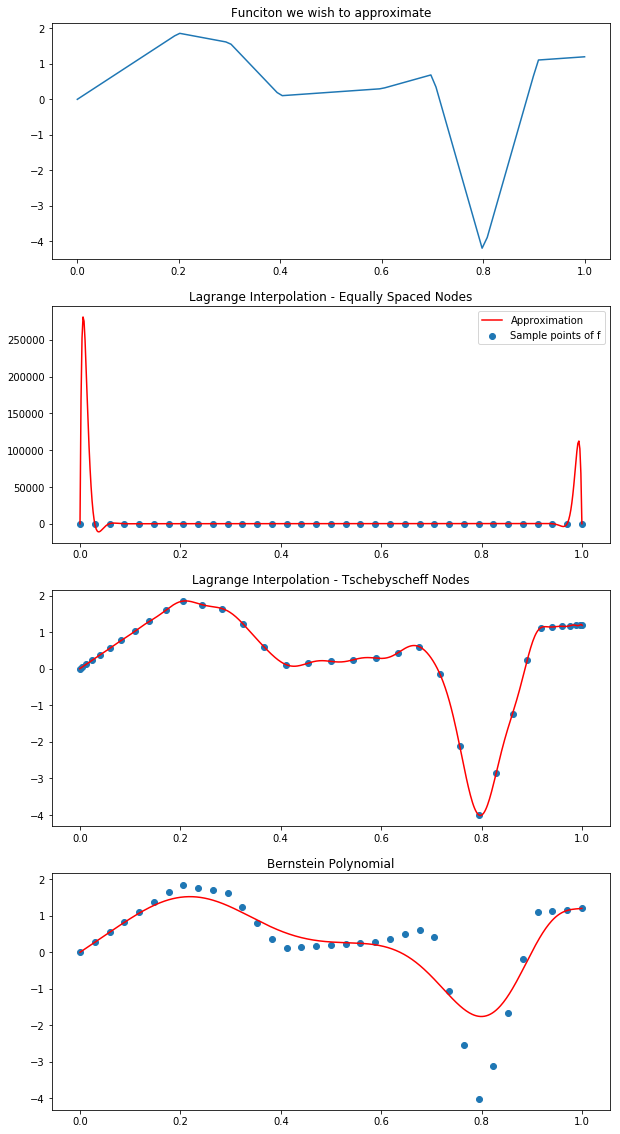

In [15]:
# Function to approximate
def f(x):
    # returns a continuous piecwise-linear function
    return (28/3*x)*(x<=0.2)+(2.4-8/3*x)*(x>0.2)*(x<=0.3)+(6.1-15*x)*(x>0.3)*(x<=0.4)+ \
        (x-0.3)*(x>0.4)*(x<=0.6)+(4*x-2.1)*(x>0.6)*(x<=0.7)+(35.7-50*x)*(x>0.7)*(x<=0.8)+ \
        (50*x-44.3)*(x>0.8)*(x<=0.9)+(0.2+x)*(x>0.9)*(x<=1)

start_point = 0
stop_point = 1
sample_num = 35

# Equally spaced sample point points
x = np.linspace(start_point,stop_point,sample_num)
# Function value at sample points
y = f(x)
# Form into nx2 matrix
x = np.reshape(x,(x.shape[0],1))
y = np.reshape(y,(y.shape[0],1))
Z = np.hstack((x,y))

# Tschebyscheff nodes
CN = getTschebyNodes(start_point,stop_point,sample_num)
# Function value at sample points
y_CN = f(CN)
# Form into nx2 matrix
CN = np.reshape(CN,(CN.shape[0],1))
y_CN = np.reshape(y_CN,(y_CN.shape[0],1))
Z_CN = np.hstack((CN,y_CN))

# Approximate function f with three different methods
Xi = np.linspace(0,1,500) # Query points
L = LagrangeInterp(Z,Xi) # Value of Lagrange polynomial calculated from equidistant sample points
L_CN = LagrangeInterp(Z_CN,Xi) # Value of Lagrange polynomial calculated from Tschebyscheff nodes
B = BernsteinPoly(Z,Xi) # Value of Bernstein polynomial points in Xi

# Plots
fig = plt.figure(figsize=(10,20))
ax4 = plt.subplot(411)
ax4.plot(np.linspace(0,1,100),f(np.linspace(0,1,100)))
plt.title('Funciton we wish to approximate')
ax1 = plt.subplot(412)
ax1.scatter(x,y)
ax1.plot(Xi,L,'-r')
plt.legend(('Approximation','Sample points of f'))
plt.title('Lagrange Interpolation - Equally Spaced Nodes')
ax2 = plt.subplot(413)
ax2.scatter(CN,y_CN)
ax2.plot(Xi,L_CN,'-r')
plt.title('Lagrange Interpolation - Tschebyscheff Nodes')
ax3 = plt.subplot(414)
ax3.scatter(x,y)
ax3.plot(Xi,B,'-r')
plt.title('Bernstein Polynomial')
plt.show()

Runge's Phenomenon refers to the oscillatory behviour that can be present when interpolating equally-spaced data points with a high-degree polynomial. In the plot *Lagrange Interpolation - Equally Spaced Nodes*, we can see oscillations up to 6 orders of magnitude larger than the function being estimated. However, if, instead of using equally spaced data points, we interpolate data at so-called *Tschebyscheff Nodes*, which are defined as
$$\cos \left( \frac{2k-1}{2n} \pi \right)  $$
for $k=1,...,n$, as in the plot *Lagrange Interpolation - Tschebyscheff Nodes*, this phenomenon does not present itself. In the final plot above, we can compare the Lagrange interpolation methods with fitting via the Berstein polynomial. What is apparent is that, although the Bernstein polynomial does not follow the data as closely, it is more stable in some sense. One could interpret this as trading more bias for less variance.